# 지도에 찍어보겠브다

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv

import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import folium
# import networkx as nx

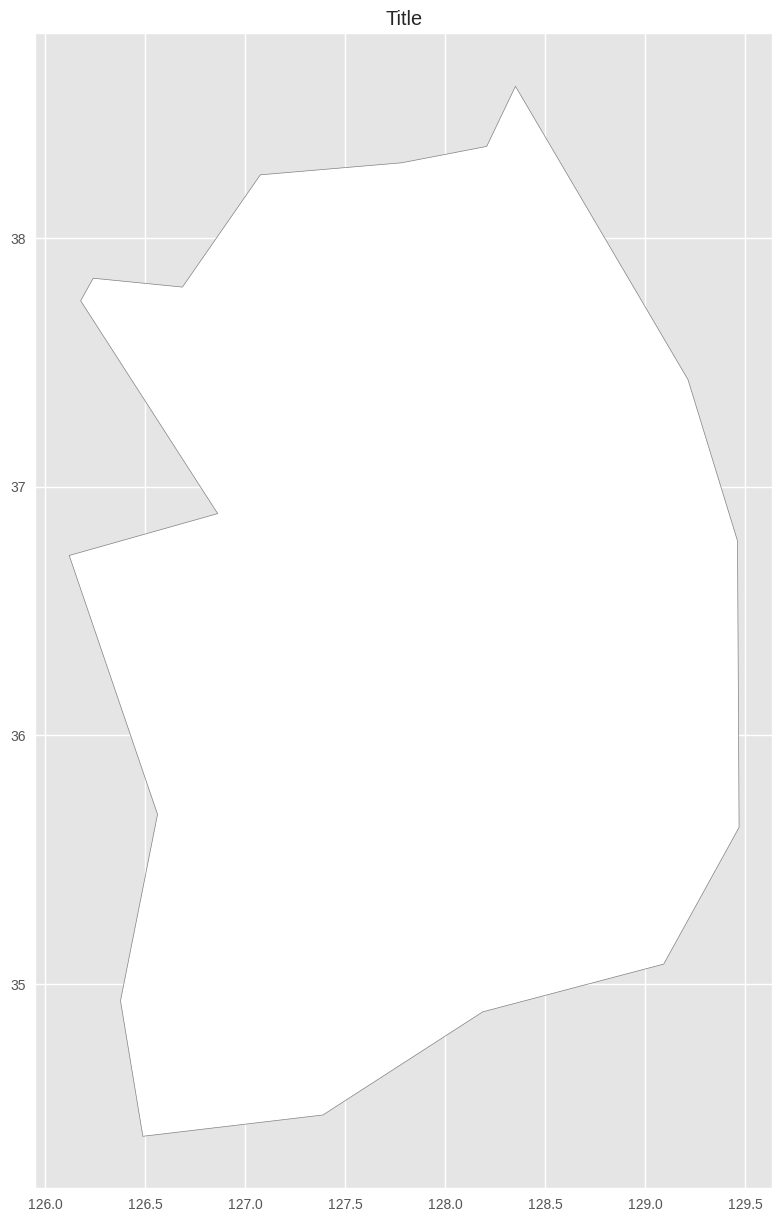

In [19]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

with plt.style.context(("seaborn", "ggplot")):
    ## Plot world
    world[world.name == "South Korea"].plot(figsize=(15,15), edgecolor="grey", color="white");

    ## Loop through each flight plotting line depicting flight between source and destination
    ## We are also plotting scatter points depicting source and destinations
    # for slat,dlat, slon, dlon, num_flights in zip(brazil_cnt_df["LatOrig"], brazil_cnt_df["LatDest"], brazil_cnt_df["LongOrig"], brazil_cnt_df["LongDest"], brazil_cnt_df["Num_Of_Flights"]):
    #     plt.plot([slon , dlon], [slat, dlat], linewidth=num_flights/100, color="lime", alpha=0.5)
    #     plt.scatter( [slon, dlon], [slat, dlat], color="orangered", alpha=0.1, s=num_flights)

    plt.title("Title")

    # plt.savefig("connection-map-geopandas-4.png", dpi=100)
    plt.show()

# 서울은 없다

In [27]:
# fig = go.Figure(data=go.Scattergeo(
#     lat = [40.7127, 51.5072],
#     lon = [-74.0059, 0.1275],
#     mode = 'lines',
#     line = dict(width = 2, color = 'blue'),
# ))
import json

with open('./geojson/new.geojson', 'r') as j:
    seoul_geo = json.load(j)

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

# lines = df[['위도', '경도']].values[:5].tolist()

folium.PolyLine(locations=cities, tooltip='PolyLine').add_to(m)


folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)



# seoul_info = pd.read_csv('./sample.txt', delimiter='\t')
# seoul_info = seoul_info.iloc[3:,:]
# seoul_info = seoul_info[seoul_info['동']!='소계']
# seoul_info['full_name'] = '서울특별시'+' '+seoul_info['자치구']+' '+seoul_info['동']
# seoul_info['full_name'] = seoul_info['full_name'].apply(lambda x: x.replace('.','·'))
# seoul_info['인구'] = seoul_info['인구'].apply(lambda x: int(''.join(x.split(','))))

# fig = px.(seoul_info,
#                            geojson=seoul_geo,
#                         #    locations='full_name',
#                         #    color='인구',
#                            color_continuous_scale='viridis', featureidkey = 'properties.adm_nm',
#                            mapbox_style='carto-positron',
#                            zoom=9.5,
#                            center = {"lat": 37.563383, "lon": 126.996039},
#                            opacity=0.5,
#                           )

# fig = px.choropleth_mapbox(
#     seoul_info,
#     geojson=seoul_geo,
#     locations='full_name',
#     color='인구',
#     color_continuous_scale='viridis',
#     featureidkey='properties.adm_nm',
#     mapbox_style='carto-positron',
#     zoom=9.5,
#     center={
#         "lat": 37.563383,
#         "lon": 126.996039
#     },
#     opacity=0.5,
# )

# fig.update_layout(
#     title_text = 'London to NYC Great Circle',
#     showlegend = False,
#     geo = dict(
#         resolution = 50,
#         showland = True,
#         showlakes = True,
#         landcolor = 'rgb(204, 204, 204)',
#         countrycolor = 'rgb(204, 204, 204)',
#         lakecolor = 'rgb(255, 255, 255)',
#         projection_type = "equirectangular",
#         coastlinewidth = 2,
#         lataxis = dict(
#             range = [20, 60],
#             showgrid = True,
#             dtick = 10
#         ),
#         lonaxis = dict(
#             range = [-100, 20],
#             showgrid = True,
#             dtick = 20
#         ),
#     )
# )

#fig.show()
m

NameError: name 'cities' is not defined

# 도착을 기준으로 Choropleth

In [2]:
# import pandas as pd

with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]

with open("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202001/생활이동_자치구_202001_00시.csv",
          encoding='cp949') as f:
    data = pd.read_csv(f)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data.loc[data['이동인구(합)'] == '*', '이동인구(합)'] = 0

# tst = {key: value for key, value in zip(data1['소분류'], data1['시군구']+" "+data1['읍면동'])} # 이건 자치구용
tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}
#tst = {11010:"ㅁㄴㅇㄹ"}
print(tst)

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data)



{11010: '종로구', 11020: '중구', 11030: '용산구', 11040: '성동구', 11050: '광진구', 11060: '동대문구', 11070: '중랑구', 11080: '성북구', 11090: '강북구', 11100: '도봉구', 11110: '노원구', 11120: '은평구', 11130: '서대문구', 11140: '마포구', 11150: '양천구', 11160: '강서구', 11170: '구로구', 11180: '금천구', 11190: '영등포구', 11200: '동작구', 11210: '관악구', 11220: '서초구', 11230: '강남구', 11240: '송파구', 11250: '강동구'}
          대상연월 요일  도착시간 출발 시군구 코드 도착 시군구 코드 성별  나이 이동유형  평균 이동 시간(분) 이동인구(합)
212     202001  일     0       종로구        중구  F  10   EE           50   12.07
213     202001  일     0       종로구        중구  F  10   EH           20    5.65
214     202001  일     0       종로구        중구  F  15   EE           30   32.67
215     202001  일     0       종로구        중구  F  15   EH           20   16.28
216     202001  일     0       종로구        중구  F  20   WE           20    6.51
...        ... ..   ...       ...       ... ..  ..  ...          ...     ...
818630  202001  토     0       강동구       송파구  M  70   WH           10   18.52
818631  202001  토     0       강

In [3]:
data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values()#.head(10)
print(data2)
data2point5 = pd.DataFrame(data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum().sort_values())
data2point5 = data2point5.reset_index()
# data2point5 = pd.DataFrame(data2)
data2point5
# print(list(data2))
#regions = ['금천구','종로구','양천구','용산구','도봉구','성동구','중구','구로구','서대문구','중랑구','강북구','동대문구','광진구','동작구','은평구','서초구','영등포구','강동구','성북구','강서구','노원구','관악구','마포구','송파구','강남구']  


출발 시군구 코드  도착 시군구 코드
도봉구        금천구           2050
강북구        금천구           2160
중랑구        금천구           2770
도봉구        양천구           3260
           구로구           3510
                        ...  
강동구        송파구          26510
강남구        서초구          26570
서초구        동작구          27330
강남구        송파구          27570
송파구        강동구          30660
Name: 평균 이동 시간(분), Length: 600, dtype: int64


,도착 시군구 코드,평균 이동 시간(분)
0,금천구,212830
1,도봉구,273560
2,양천구,276680
3,종로구,280930
4,구로구,289140
5,성동구,295930
6,서대문구,300840
7,중랑구,307630
8,용산구,309390
9,중구,310270


In [13]:
import json

with open('./geojson/new.geojson') as j:
    seoul_geo = json.load(j)

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.Choropleth(
    geo_data=seoul_geo,
    name="choropleth",
    data=data2point5,
    columns=["도착 시군구 코드", "평균 이동 시간(분)"],
    key_on="properties.name",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="레게노",
).add_to(m)

folium.LayerControl().add_to(m)

m